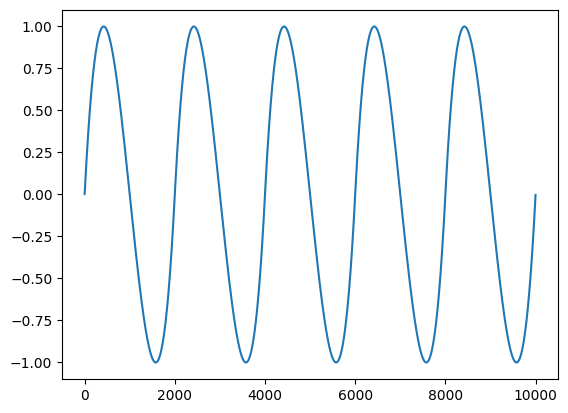

In [5]:
#Создадим Cubic Signal
from thinkdsp import CubicSignal, decorate

in_wave = CubicSignal(freq=0.0005).make_wave(duration=10000, framerate=1)
in_wave.plot()

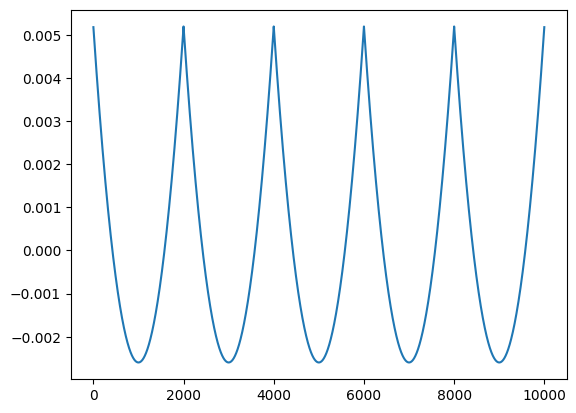

In [6]:
out_wave = in_wave.diff()
out_wave.plot()

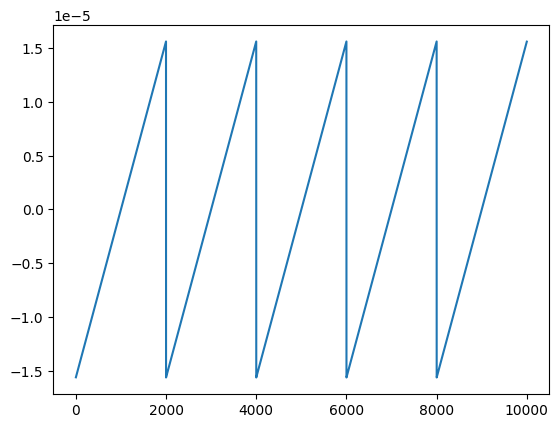

In [7]:
out_wave = out_wave.diff()
out_wave.plot()

Двойное дифферцирование дало нам SawTooth сигнал

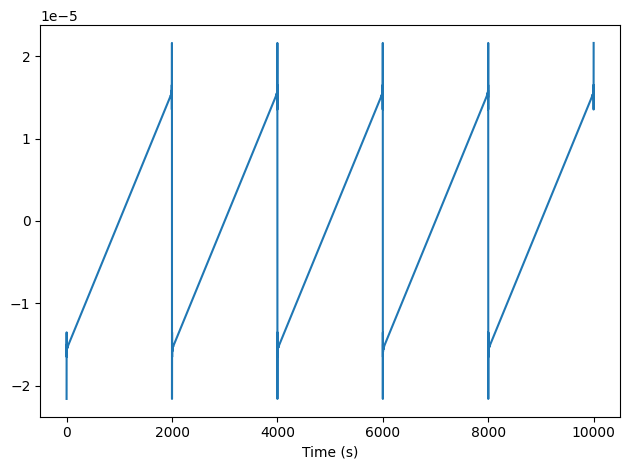

In [8]:
spectrum = in_wave.make_spectrum().differentiate().differentiate()
out_wave2 = spectrum.make_wave()
out_wave2.plot()
decorate(xlabel='Time (s)')

Присутствует звон всвязи с неопределенностью производной в некоторых точках.

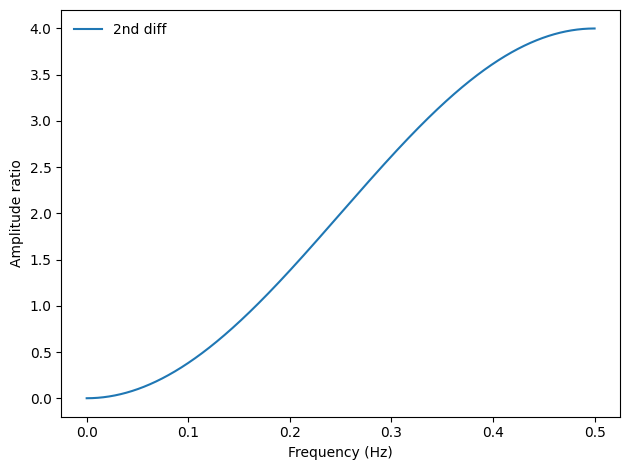

In [9]:
from thinkdsp import zero_pad
from thinkdsp import Wave
import numpy as np

diff_window = np.array([-1.0, 2.0, -1.0])
padded = zero_pad(diff_window, len(in_wave))
diff_wave = Wave(padded, framerate=in_wave.framerate)
diff_filter = diff_wave.make_spectrum()
diff_filter.plot(label='2nd diff')

decorate(xlabel='Frequency (Hz)',
                 ylabel='Amplitude ratio')

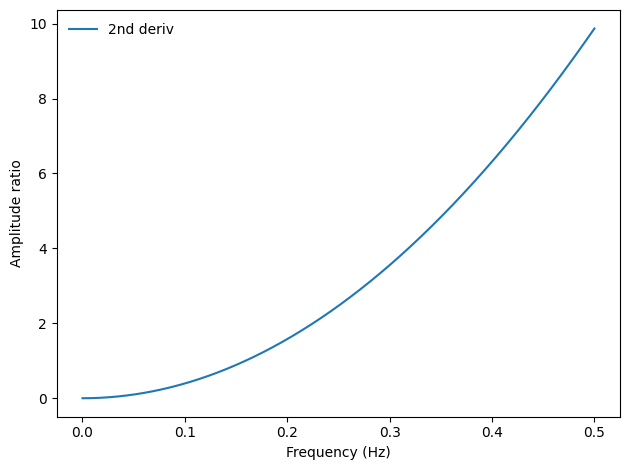

In [10]:
PI2 = np.pi * 2

deriv_filter = in_wave.make_spectrum()
deriv_filter.hs = (PI2 * 1j * deriv_filter.fs)**2
deriv_filter.plot(label='2nd deriv')

decorate(xlabel='Frequency (Hz)',
                 ylabel='Amplitude ratio')

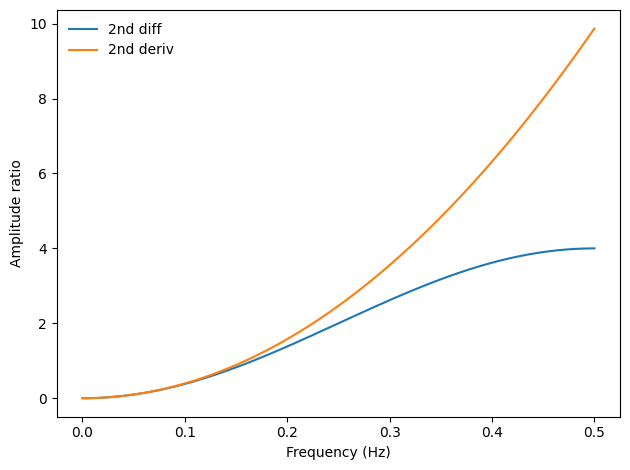

In [11]:
diff_filter.plot(label='2nd diff')
deriv_filter.plot(label='2nd deriv')

decorate(xlabel='Frequency (Hz)',
                 ylabel='Amplitude ratio')

Оба фильтра являются фильтрами высоких частот, которые усиливают компоненты самых высоких частот. Вторая производная параболическая, поэтому она в наибольшей степени усиливает самые высокие частоты. Вторая разница является хорошим приближением ко второй производной только на самых низких частотах, затем она существенно отклоняется.